# Corporate Prosecution - Exercise B

#### Summary

Looking at corporate prosecutions over time, and the possible assignment of a compliance officer.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Data Source(s)

The UVA School of Law publishees a [Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

> The goal of this Corporate Prosecutions Registry is to provide comprehensive and up-to-date information on federal organizational prosecutions in the United States, so that we can better understand how corporate prosecutions are brought and resolved. We include detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990.

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [1]:
import pandas as pd 

df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

### Check that your dataframe has 3038 rows and 56 columns.

In [4]:
df.shape

(3038, 56)

### List the columns and their data types

In [5]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- COUNTRY
- FINE
- TOTAL_PAYMENT
- USAO
- PROBATION_LENGTH
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [6]:
# PRIMARY_CRIME_CODE= type of crime committed 
# DISPOSITION_TYPE= Indicates whether the prosecution was resolved through a 
# type of agreement: a plea ("plea"); non-prosecution agreement ("NP"); 
#     or deferred prosecution agreement ("DP"); or whether the prosecution 
#     was resolved at trial in a conviction ("trial conviction") or acquittal
#     ("acquittal") or a dismissal before or during trial 
# AGREEMENT_TYPE= Indicates whether the agreement is a plea ("plea"), 
# non-prosecution agreement ("NP"), or deferred prosecution agreement ("DP")

# COUNTRY- where the crime took place
# FINE- amount of fine in US Dollars
# TOTAL_PAYMENT-Sum of all monetary penalties (i.e. fines, restitution, forfeiture, 
# disgorgements, community service, etc.)
# USAO- U.S. Attorney's Offices involved in the prosecution. 
# Multiple entries are separated by a "|".
# PROBATION_LENGTH- length of probation in months
# AGREEMENT_REQUIRED_NEW_POSITIONS- the agreement stated that new positions be 
# created at a firm, typically related to compliance
# INDEP_MONITOR_REQUIRED- does the agreement require that an independent actor 
# be retained to supervise implementation of a compliance program

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [7]:
df.shape[1]

56

## Set pandas to display 65 columns

In [8]:
pd.options.display.max_info_columns = 65

In [9]:
pd.options.display.max_info_columns

65

## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [10]:
pd.options.display.max_info_rows= 100

In [11]:
pd.options.display.max_info_rows

100

## Describe the TOTAL_PAYMENT column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [12]:
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN


In [13]:
df['TOTAL_PAYMENT'].head()

0    272734
1     24000
2        50
3     14640
4     27500
Name: TOTAL_PAYMENT, dtype: int64

In [14]:
pd.set_option("display.float_format", "{:.0f}".format)

In [15]:
df['TOTAL_PAYMENT'].max(),df['TOTAL_PAYMENT'].mean(), df['TOTAL_PAYMENT'].min()

(4486800000, 22842732.114219882, 0)

### Oh that's ugly ugly ugly. Set pandas to format floats with 2 decimal points, we probably don't need to be more specific than that. Oh, and tell it to use a `,` in the thousands position!

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [16]:
pd.set_option("display.float_format", "{:,.2f}".format)

In [17]:
df['TOTAL_PAYMENT'].agg({'min','max','mean'})

max    4,486,800,000.00
mean      22,842,732.11
min                0.00
Name: TOTAL_PAYMENT, dtype: float64

## Look at the fine and the forfeiture disgorgement for the first two rows. Pretty nice!

In [18]:
df['FINE'].head(2)

0        0.00
1   24,000.00
Name: FINE, dtype: float64

In [19]:
df['FORFEITURE_DISGORGEMENT'].head(2) 

0   272,734.00
1          nan
Name: FORFEITURE_DISGORGEMENT, dtype: float64

# A little summarizing

## How many of cases actually went to trial? How did most of these cases arrive at a decision?

In [20]:
#number of cases that went to trial 
df['JUDGMENT_DATE'].value_counts().sum()

2532

In [21]:
#most of these cases arrived at a decisions by a plea
df['DISPOSITION_TYPE'].value_counts()

plea               2565
NP                  266
DP                  201
trial convicton       2
declination           2
dismissal             2
Name: DISPOSITION_TYPE, dtype: int64

### Graph the previous answer, with the longest bar on top

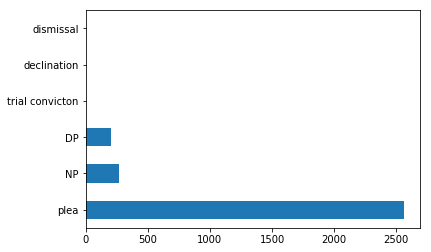

In [22]:
df['DISPOSITION_TYPE'].value_counts().plot(kind='barh')

## What's the distribution of total payments look like?

In [23]:
df['TOTAL_PAYMENT'].value_counts(ascending=False)

0            370
100000        92
500000        79
10000         73
50000         70
1000000       55
5000          51
200000        49
250000        49
25000         41
75000         35
20000         30
15000         30
2000000       29
30000         28
40000         27
150000        25
300000        25
400000        22
1500000       20
750000        19
1000          18
50            17
3000000       17
4000000       15
125000        14
60000         14
5000000       14
4000          12
600000        11
            ... 
31290          1
25145          1
1043000        1
164403         1
57899          1
352288         1
100424         1
320019         1
546000000      1
41485          1
1014282        1
14854          1
6650           1
11481593       1
4108779        1
782825         1
6928872        1
106983         1
1356939        1
35300          1
2404833        1
11500000       1
53819870       1
395000000      1
23000          1
8462807        1
18792000       1
537731535     

## Sort by total payments, descending

In [24]:
#see above

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, total payment, and date.

In [25]:
df2 = df[['COMPANY', 'DISPOSITION_TYPE', 'TOTAL_PAYMENT', 'DATE']].copy()
df2

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25
2,"3rd & Bell, LLC",plea,50,2014-11-21
3,41 Market Inc.,plea,14640,2006-07-05
4,"45,000, Inc.",plea,27500,2005-06-03
5,4628 Group Inc.,plea,500000,2001-07-31
6,"70 North, LLC",plea,2000,2013-03-05
7,806 Trading Corp.,plea,42000,2012-03-05
8,"83rd & Union Hills, LLC",plea,50,2014-11-24
9,"84th & Bell, LLC",plea,50,2014-11-24


In [26]:
df2

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25
2,"3rd & Bell, LLC",plea,50,2014-11-21
3,41 Market Inc.,plea,14640,2006-07-05
4,"45,000, Inc.",plea,27500,2005-06-03
5,4628 Group Inc.,plea,500000,2001-07-31
6,"70 North, LLC",plea,2000,2013-03-05
7,806 Trading Corp.,plea,42000,2012-03-05
8,"83rd & Union Hills, LLC",plea,50,2014-11-24
9,"84th & Bell, LLC",plea,50,2014-11-24


## Confirm it has 3038 rows and 5 columns

In [27]:
#unsure what the 5th column should be?
df2.shape

(3038, 4)

## Using this subset, extract the year into a separate column called `year`

Your machine will complain. **Let's talk about that error.**

In [28]:
df2['year']=df2['DATE'].str.extract(r'(\d{4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [29]:
df2

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE,year
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17,2003
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25,2005
2,"3rd & Bell, LLC",plea,50,2014-11-21,2014
3,41 Market Inc.,plea,14640,2006-07-05,2006
4,"45,000, Inc.",plea,27500,2005-06-03,2005
5,4628 Group Inc.,plea,500000,2001-07-31,2001
6,"70 North, LLC",plea,2000,2013-03-05,2013
7,806 Trading Corp.,plea,42000,2012-03-05,2012
8,"83rd & Union Hills, LLC",plea,50,2014-11-24,2014
9,"84th & Bell, LLC",plea,50,2014-11-24,2014


## Make the 'year' column an integer.

Or at least *try*, then turn it into a float. Why did one work but the other didn't?

In [30]:
df2.dtypes

COMPANY             object
DISPOSITION_TYPE    object
TOTAL_PAYMENT        int64
DATE                object
year                object
dtype: object

In [31]:
df2['year'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


0      2,003.00
1      2,005.00
2      2,014.00
3      2,006.00
4      2,005.00
5      2,001.00
6      2,013.00
7      2,012.00
8      2,014.00
9      2,014.00
10     2,001.00
11     2,014.00
12     2,003.00
13          nan
14     2,012.00
15     2,013.00
16     2,011.00
17     2,004.00
18     2,005.00
19     2,009.00
20     2,016.00
21     2,012.00
22     2,005.00
23     2,008.00
24     2,010.00
25     2,010.00
26     2,001.00
27     2,004.00
28     2,004.00
29     2,012.00
         ...   
3008   2,008.00
3009   2,015.00
3010   2,011.00
3011   2,015.00
3012   2,013.00
3013   2,013.00
3014   2,001.00
3015   2,007.00
3016   2,012.00
3017   2,011.00
3018   2,002.00
3019   2,015.00
3020   2,007.00
3021   2,008.00
3022   2,007.00
3023   2,013.00
3024   2,014.00
3025   2,006.00
3026   2,014.00
3027   2,014.00
3028   2,008.00
3029   2,015.00
3030   2,013.00
3031   2,000.00
3032   2,005.00
3033   2,007.00
3034   2,015.00
3035   2,016.00
3036   2,008.00
3037   2,014.00
Name: year, Length: 3038

In [32]:
df2.dtypes

COMPANY             object
DISPOSITION_TYPE    object
TOTAL_PAYMENT        int64
DATE                object
year                object
dtype: object

## Make a histogram of cases over the years

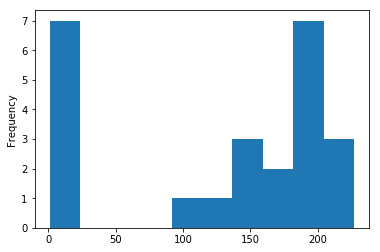

In [33]:
df2['year'].value_counts().plot(kind='hist')

## What was the total amount paid across all cases each year?

## Graph it!

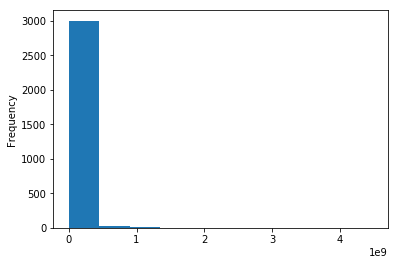

In [34]:
df2.TOTAL_PAYMENT.sort_index(ascending=False).plot(kind='hist')

# Cleaning up a column

Take a look at **AGREEMENT_REQUIRED_NEW_POSITIONS** in your **ORIGINAL DATAFRAME**. How many times does it have a value in it?

- Tip: There are a few ways to do this. Maybe you want to ask for an easy one!

In [35]:
# df = df.dropna(axis=0, how='any')

In [71]:
import numpy as np

In [72]:
np.sum( df['AGREEMENT_REQUIRED_NEW_POSITIONS'].isnull() == False)

261

### What are the top 5 responses for `AGREEMENT_REQUIRED_NEW_POSITIONS`?

In [36]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: object

## That looks messy.

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

## Start to this up by creating a new column called `required_new_position`.

This column should be `True` if a new position was required, `False` if a new position was not required, and `NaN` if it's unknown.

- Tip: You should use `.str.contains`
- Tip: Do you know how to say "at the start of a line" using regex?
- Tip: We've talked about how to avoid `cannot index with vector containing NA / NaN values` but if you get it feel free to write it on the board

In [73]:
#how do I make it:True if a new position was required, 
# False if a new position was not required, and NaN if it's unknown.
# df['required_new_position']=df['AGREEMENT_REQUIRED_NEW_POSITIONS'].str.contains('No', na=False, 'Yes',na=True)

In [80]:
df['required_new_position'] = ''

In [82]:
import re

In [99]:
for i, row in df.iterrows():
    
    value = df.loc[i,'AGREEMENT_REQUIRED_NEW_POSITIONS']
    
    if(type(value) == str):
        
        if(re.search('^Yes;',value)):
            df.loc[i,'required_new_position'] = True
        elif(re.search('^No',value)):
            df.loc[i,'required_new_position'] = False
    else:
        df.loc[i,'required_new_position'] = np.nan
    

In [102]:
df['required_new_position']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23       True
24        NaN
25      False
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
3008      NaN
3009      NaN
3010      NaN
3011      NaN
3012      NaN
3013      NaN
3014      NaN
3015      NaN
3016      NaN
3017      NaN
3018      NaN
3019      NaN
3020     True
3021      NaN
3022      NaN
3023      NaN
3024      NaN
3025      NaN
3026      NaN
3027      NaN
3028      NaN
3029      NaN
3030      NaN
3031      NaN
3032      NaN
3033     True
3034      NaN
3035      NaN
3036      NaN
3037      NaN
Name: required_new_position, Length: 3038, dtype: object

### Confirm that your new column has 163 `True` values and 98 `False` values

In [103]:
df['required_new_position'].value_counts()

False    163
True      98
Name: required_new_position, dtype: int64

## Extract the position name into a new column called `new_position`

In [106]:
df['new_position'] = ''

In [120]:
for i, row in df.iterrows():
    
    if df.loc[i,'required_new_position'] == True:
        
        if(re.search('[a-zA-Z\s]+$',value)):
        
            value = df.loc[i,'AGREEMENT_REQUIRED_NEW_POSITIONS']

            position = re.search('[a-zA-Z\s]+$',value)
            df.loc[i,'new_position'] = position.group(0)


In [122]:
df['new_position']

0                                             
1                                             
2                                             
3                                             
4                                             
5                                             
6                                             
7                                             
8                                             
9                                             
10                                            
11                                            
12                                            
13                                            
14                                            
15                                            
16                                            
17                                            
18                                            
19                                            
20                                            
21           

## Make sure you extracted correctly

The line below should show at least SIX rows. If it doesn't show any rows, something went wrong!

- Tip: A `.value_counts()` might look okay, even though something is a little off.

In [ ]:
df[df.new_position == " Compliance Officer"]

## Find all cases that required a compliance officer

That one above only gives us six. We want more! **Find at least 23 cases that required the creation of a compliance officer.**

- Tip: Regular expressions might be your friend here
- Tip: If you get an error about **new_position** not being found, change your code from when you created the column from `df.new_position = ...` to `df['new_position'] = ...`

## View the cases that have a compliance officer again.

This time you shouldn't have a `...` in the middle of your dataframe.

## What were the most popular crimes that required a compliance officer's appointment?

# Make a comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."